☑️ First 5 rows:
    id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  

☑️ Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                -----

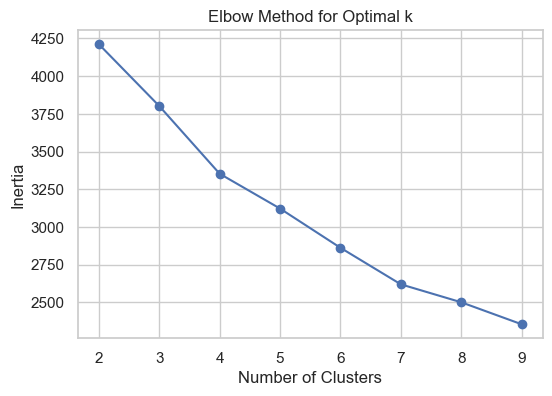

☑️ Silhouette Score: 0.15


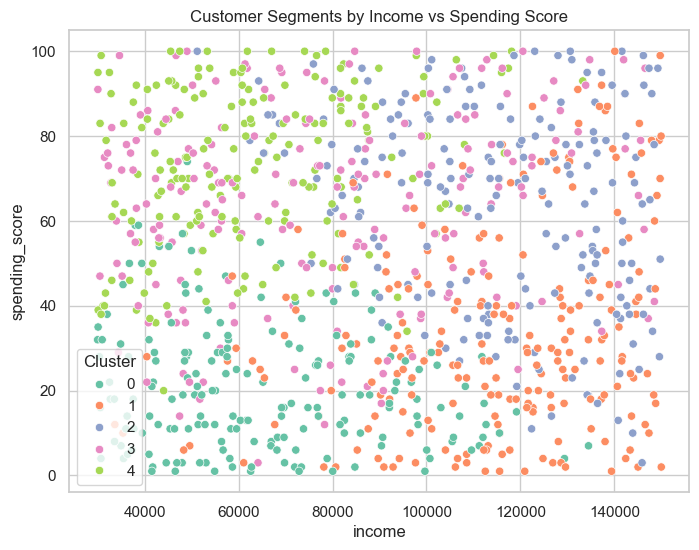

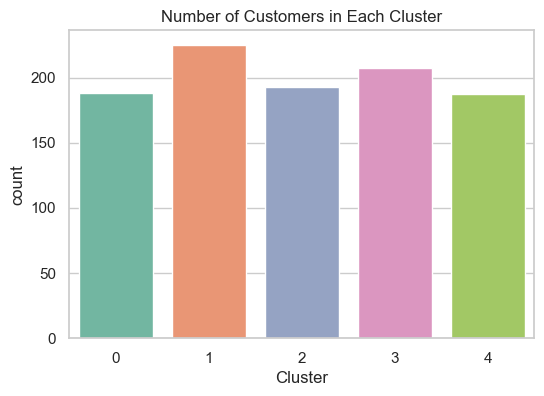

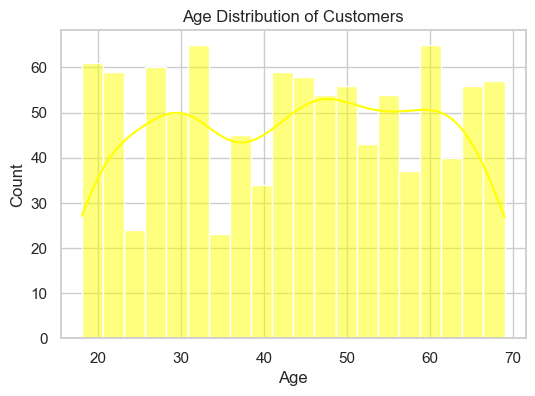

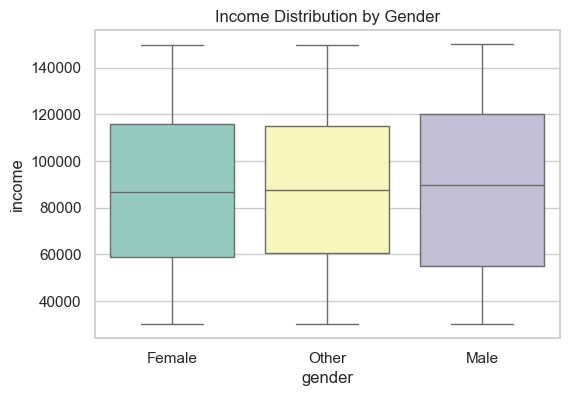

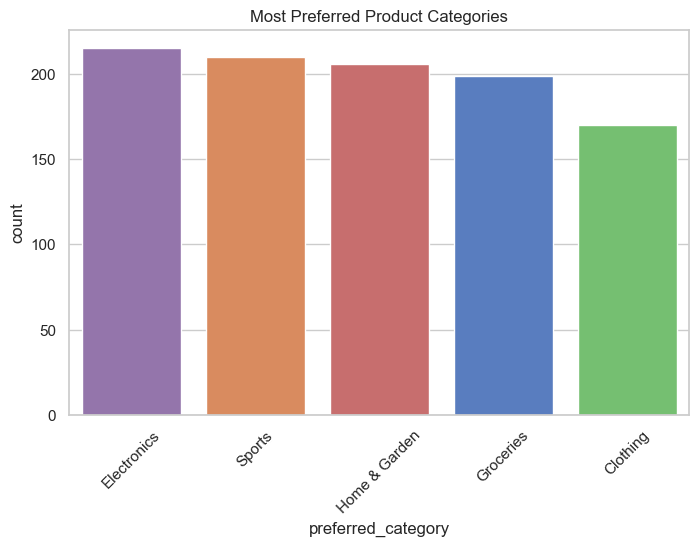

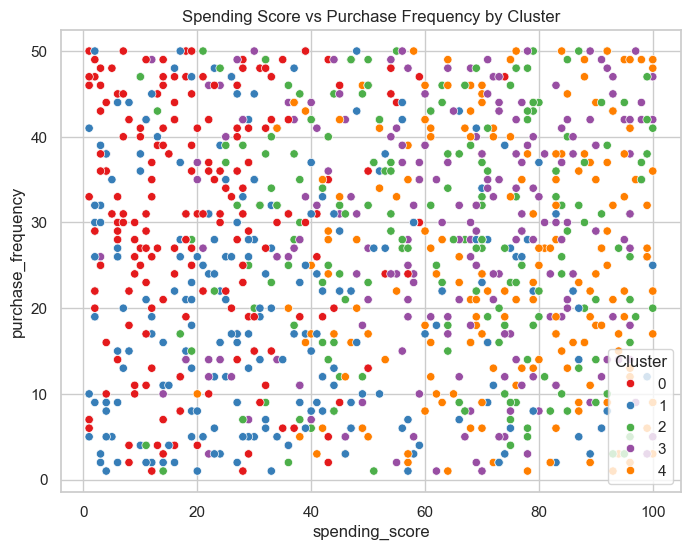

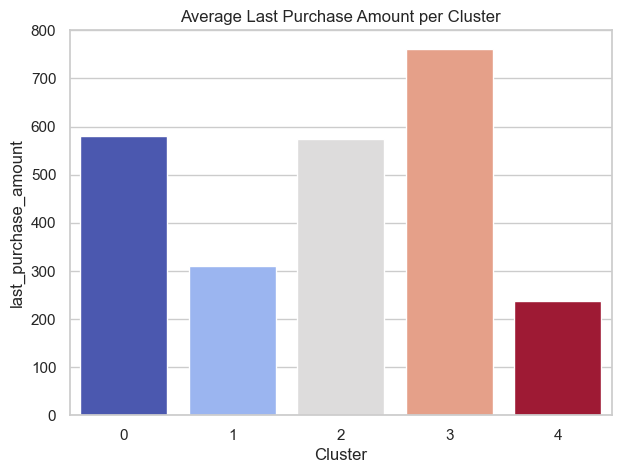

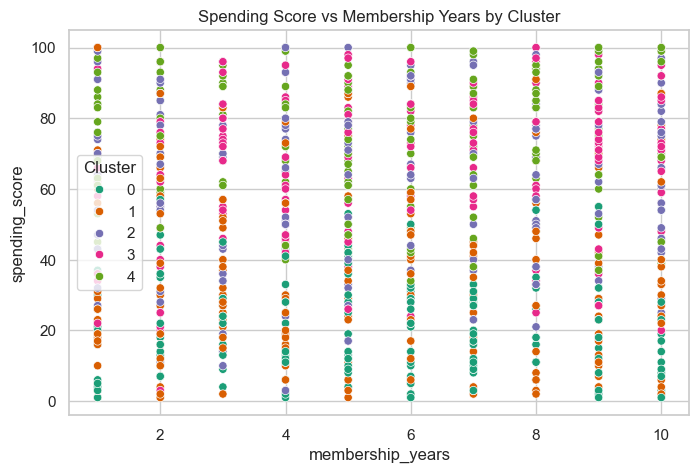


☑️ Cluster Summary (Average Values):
                age         income  spending_score  purchase_frequency  \
Cluster                                                                 
0        36.388298   65846.563830       20.707447           30.712766   
1        53.244444  113775.448889       34.088889           21.026667   
2        29.963731  115533.227979       63.000000           28.124352   
3        57.318841   78931.497585       64.057971           28.478261   
4        39.112299   63558.486631       73.278075           25.497326   

         last_purchase_amount  
Cluster                        
0                  581.180053  
1                  310.699467  
2                  574.463523  
3                  762.153575  
4                  238.193529  

☑️ Recommendations:
- Cluster 0: avg income=65846.56, spending_score=20.71, freq=30.71
  -> Low-engagement customers, offer discounts to retain.
- Cluster 1: avg income=113775.45, spending_score=34.09, freq=21.03
  -> Medium

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load Dataset:
data = pd.read_csv("C:/Users/Abdullah Umer/Desktop/Data Zenix Solutions Internship/Project 2/Customer_ Segmentation_ Data.csv")

print("☑️ First 5 rows:\n", data.head())
print("\n☑️ Dataset Info:\n")
print(data.info())

# 2. Data Cleaning and Exploration:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

# 3. Descriptive Statistics:
print("\n☑️ Descriptive Statistics:\n", data.describe())

# Example metrics
avg_purchase = data['last_purchase_amount'].mean()
avg_freq = data['purchase_frequency'].mean()
print(f"☑️ Average Purchase Amount: {avg_purchase:.2f}")
print(f"☑️ Average Purchase Frequency: {avg_freq:.2f}")

# 4. Customer Segmentation (K-Means Clustering):
# Select features for clustering
features = ['age', 'income', 'spending_score', 'purchase_frequency', 'last_purchase_amount']
X = data[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose k=5 for example (can adjust based on elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clustering with silhouette score
score = silhouette_score(X_scaled, data['Cluster'])
print(f"☑️ Silhouette Score: {score:.2f}")

# 5. Visualization of Customer Segments:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.scatterplot(x='income', y='spending_score', hue="Cluster", data=data, palette="Set2")
plt.title("Customer Segments by Income vs Spending Score")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', hue='Cluster', data=data, palette="Set2", legend=False)
plt.title("Number of Customers in Each Cluster")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data['age'], bins=20, kde=True, color="yellow")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='income', hue='gender', data=data, palette="Set3", legend=False)
plt.title("Income Distribution by Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='preferred_category', hue='preferred_category', data=data,
              order=data['preferred_category'].value_counts().index,
              palette="muted", legend=False)
plt.title("Most Preferred Product Categories")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='spending_score', y='purchase_frequency', hue='Cluster', data=data, palette="Set1")
plt.title("Spending Score vs Purchase Frequency by Cluster")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(x='Cluster', y='last_purchase_amount', hue='Cluster', data=data,
            errorbar=None, palette="coolwarm", legend=False)
plt.title("Average Last Purchase Amount per Cluster")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='membership_years', y='spending_score', hue='Cluster', data=data, palette="Dark2")
plt.title("Spending Score vs Membership Years by Cluster")
plt.show()

# 6. Insights & Recommendations:
cluster_summary = data.groupby('Cluster')[features].mean()
print("\n☑️ Cluster Summary (Average Values):\n", cluster_summary)

print("\n☑️ Recommendations:")
for cluster_id, row in cluster_summary.iterrows():
    print(f"- Cluster {cluster_id}: avg income={row['income']:.2f}, spending_score={row['spending_score']:.2f}, freq={row['purchase_frequency']:.2f}")
    if row['spending_score'] > 70:
        print("  -> High-value customers, target with premium offers.")
    elif row['spending_score'] < 30:
        print("  -> Low-engagement customers, offer discounts to retain.")
    else:
        print("  -> Medium-value customers, nurture with loyalty programs.")
